## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mouse_count = combined_data_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data_df[["Mouse ID", "Timepoint"]].value_counts()
duplicate_mouse

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])

In [6]:
#check to see if duplicate data has been dropped
duplicate_mouse_df = clean_data_df.loc[clean_data_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
# Check the number of mice in the clean DataFrame.
mouse_count = clean_data_df["Mouse ID"].count()
mouse_count

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#groupby
drug_grouped = clean_data_df.groupby(["Drug Regimen"])
#mean
tumor_mean = drug_grouped["Tumor Volume (mm3)"].mean()
#median
tumor_median = drug_grouped["Tumor Volume (mm3)"].median()
#variance
tumor_variance = drug_grouped["Tumor Volume (mm3)"].var()
#standard deviation
tumor_std = drug_grouped["Tumor Volume (mm3)"].std()
#SEM
tumor_sem = drug_grouped["Tumor Volume (mm3)"].sem()

#summary table
summary_stats = pd.DataFrame({"Mean": tumor_mean, 
                              "Median":tumor_median, 
                              "Variance":tumor_variance, 
                              "Standard Deviation": tumor_std, 
                              "SEM": tumor_sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#groupby drug regimen
group_by_agg = clean_data_df.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = group_by_agg.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_table_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

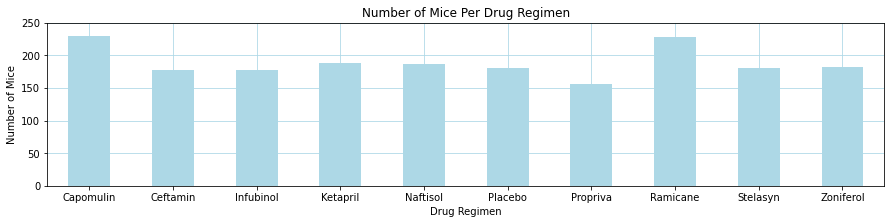

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
totalmice_perdrug = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
totalmice_perdrug


#pandas bar plot with labels/size/color/rotation
totalmice_perdrug.plot.bar(xlabel="Drug Regimen", 
                           ylabel="Number of Mice", 
                           title="Number of Mice Per Drug Regimen", 
                           figsize=(15, 3), 
                           color="lightblue", 
                           rot=0)

# Set a grid on the plot
plt.grid(color="lightblue")

#set y limit
plt.ylim(0,250)

plt.show()

In [11]:
#sort drugs
sorted_drugs = clean_data_df.sort_values(by='Drug Regimen', ascending=True,)

#grab unique drugs and put into list
drugs = (sorted_drugs["Drug Regimen"].unique()).tolist()

#show drug list
print(drugs)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [12]:
#get number of mice and put into list
mice = (clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

#show mice list
mice

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

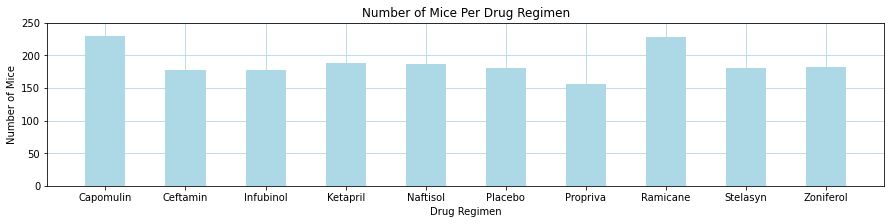

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(15,3))

# Set a grid on the plot
plt.grid(color="lightblue")

#bar plot
plt.bar(drugs, mice, color="lightblue", align="center", width=.5)

#title bar chart
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#set y limit
plt.ylim(0,250)

#show bar chart
plt.show()

In [14]:
unique_sex = clean_data_df["Sex"].unique()

total_mice = clean_data_df["Mouse ID"].nunique()

total_female = clean_data_df.loc[clean_data_df['Sex']=='Female',:].nunique().iloc[0]

total_male = clean_data_df.loc[clean_data_df['Sex']=='Male',:].nunique().iloc[0]

perc_male = (total_male/total_mice) * 100

perc_female = (total_female/total_mice) * 100

gender_stats_df = pd.DataFrame({"Sex": unique_sex,
                             "Total Count": [total_male, total_female],
                             "Distribution": [perc_male, perc_female]
                            })
gender_stats_df

,Sex,Total Count,Distribution
0,Male,125,50.200803
1,Female,124,49.799197


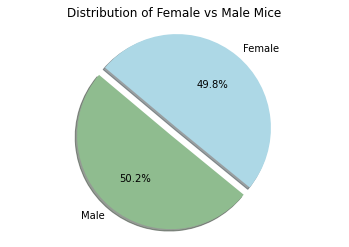

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ("Male", "Female")
explode = (0.1,0)
colors = ("darkseagreen", "lightblue")

#pie chart
gender_stats_df.plot.pie(y='Distribution', title='Distribution of Female vs Male Mice', ylabel=(''), labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, legend=None)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#show pie chart
plt.show()

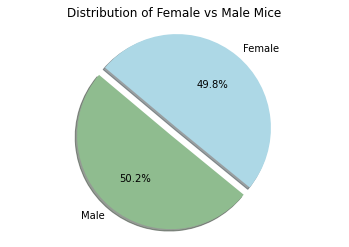

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#data for pie chart
labels = ("Male", "Female")
explode = (0.1,0)
colors = ("darkseagreen", "lightblue")
gender_data = gender_stats_df['Distribution']

#pie chart
plt.pie(gender_data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#title
plt.title('Distribution of Female vs Male Mice')

# create axes which are equal so we have a perfect circle
plt.axis("equal")

#show pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
removed_columns_df = clean_data_df[["Mouse ID", "Timepoint", "Drug Regimen",
                            "Tumor Volume (mm3)", "Weight (g)"]]
removed_columns_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Weight (g)
0,k403,0,Ramicane,45.000000,16
1,k403,5,Ramicane,38.825898,16
2,k403,10,Ramicane,35.014271,16
3,k403,15,Ramicane,34.223992,16
4,k403,20,Ramicane,32.997729,16


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
certain_drugs = removed_columns_df.loc[(removed_columns_df['Drug Regimen']=='Capomulin') | 
                                  (removed_columns_df['Drug Regimen']=='Ramicane') | 
                                  (removed_columns_df['Drug Regimen']=='Infubinol') | 
                                  (removed_columns_df['Drug Regimen']=='Ceftamin'), :]

# Start by getting the last (greatest) timepoint for each mouse
groupby_timepoint_df = removed_columns_df.groupby(["Mouse ID"]).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_drug_df = pd.merge(groupby_timepoint_df, certain_drugs, on=["Mouse ID", "Timepoint", "Weight (g)", "Drug Regimen"])

#drop tumor volume y
del combined_drug_df['Tumor Volume (mm3)_x']

#rename tumor volume x
combined_drug_df = combined_drug_df.rename(columns={"Tumor Volume (mm3)_y": "Tumor Volume (mm3)"})

#show sample of data table 
combined_drug_df.head()

,Mouse ID,Timepoint,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,a203,45,Infubinol,23,67.973419
1,a251,45,Infubinol,25,65.525743
2,a275,45,Ceftamin,28,62.999356
3,a411,45,Ramicane,22,38.407618
4,a444,45,Ramicane,25,43.047543


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ceftamin", "Ramicane", "Infubinol"]
# add subset 

In [20]:
# Locate the rows which contain mice on Capomulin and get the tumor volumes
capomulin_data = combined_drug_df.loc[(combined_drug_df['Drug Regimen']=='Capomulin'), :]
#capomulin_data 
capomulin_vol = capomulin_data["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_quartiles = capomulin_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of the tumor volumes for Capomulin is: {round(capomulin_lowerq,2)}")
print(f"The upper quartile of the tumor volumes for Capomulin is: {round(capomulin_upperq,2)}")
print(f"The interquartile range of the tumor volumes for Capomulin is: {round(capomulin_iqr,2)}")
print(f"The median of the tumor volumes for Capomulin is: {round(capomulin_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {round(capomulin_lower_bound,2)} could be outliers.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers.")

The lower quartile of the tumor volumes for Capomulin is: 32.38
The upper quartile of the tumor volumes for Capomulin is: 40.16
The interquartile range of the tumor volumes for Capomulin is: 7.78
The median of the tumor volumes for Capomulin is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [21]:
# Locate the rows which contain mice on Ceftamin and get the tumor volumes
ceftamin_data = combined_drug_df.loc[(combined_drug_df['Drug Regimen']=='Ceftamin'), :]
#ceftamin_data 
ceftamin_vol = ceftamin_data["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_quartiles = ceftamin_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of the tumor volumes for Ceftamin is: {round(ceftamin_lowerq,2)}")
print(f"The upper quartile of the tumor volumes for Ceftamin is: {round(ceftamin_upperq,2)}")
print(f"The interquartile range of the tumor volumes for Ceftamin is: {round(ceftamin_iqr,2)}")
print(f"The median of the tumor volumes for Ceftamin is: {round(ceftamin_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {round(ceftamin_lower_bound,2)} could be outliers.")
print(f"Values above {round(ceftamin_upper_bound,2)} could be outliers.")

The lower quartile of the tumor volumes for Ceftamin is: 48.72
The upper quartile of the tumor volumes for Ceftamin is: 64.3
The interquartile range of the tumor volumes for Ceftamin is: 15.58
The median of the tumor volumes for Ceftamin is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [22]:
# Locate the rows which contain mice on Ramicane and get the tumor volumes
ramicane_data = combined_drug_df.loc[(combined_drug_df['Drug Regimen']=='Ramicane'), :]
#ramicane_data 
ramicane_vol = ramicane_data["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_quartiles = ramicane_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of the tumor volumes for Ramicane is: {round(ramicane_lowerq,2)}")
print(f"The upper quartile of the tumor volumes for Ramicane is: {round(ramicane_upperq,2)}")
print(f"The interquartile range of the tumor volumes for Ramicane is: {round(ramicane_iqr,2)}")
print(f"The median of the tumor volumes for Ramicane is: {round(ramicane_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {round(ramicane_lower_bound,2)} could be outliers.")
print(f"Values above {round(ramicane_upper_bound,2)} could be outliers.")

The lower quartile of the tumor volumes for Ramicane is: 31.56
The upper quartile of the tumor volumes for Ramicane is: 40.66
The interquartile range of the tumor volumes for Ramicane is: 9.1
The median of the tumor volumes for Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [23]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes
infubinol_data = combined_drug_df.loc[(combined_drug_df['Drug Regimen']=='Infubinol'), :]
#infubinol_data 
infubinol_vol = infubinol_data["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_quartiles = infubinol_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of the tumor volumes for Infubinol is: {round(infubinol_lowerq,2)}")
print(f"The upper quartile of the tumor volumes for Infubinol is: {round(infubinol_upperq,2)}")
print(f"The interquartile range of the tumor volumes for Infubinol is: {round(infubinol_iqr,2)}")
print(f"The median of the tumor volumes for Infubinol is: {round(infubinol_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {round(infubinol_lower_bound,2)} could be outliers.")
print(f"Values above {round(infubinol_upper_bound,2)} could be outliers.")

The lower quartile of the tumor volumes for Infubinol is: 54.05
The upper quartile of the tumor volumes for Infubinol is: 65.53
The interquartile range of the tumor volumes for Infubinol is: 11.48
The median of the tumor volumes for Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [24]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [capomulin_vol, ceftamin_vol, ramicane_vol, infubinol_vol]

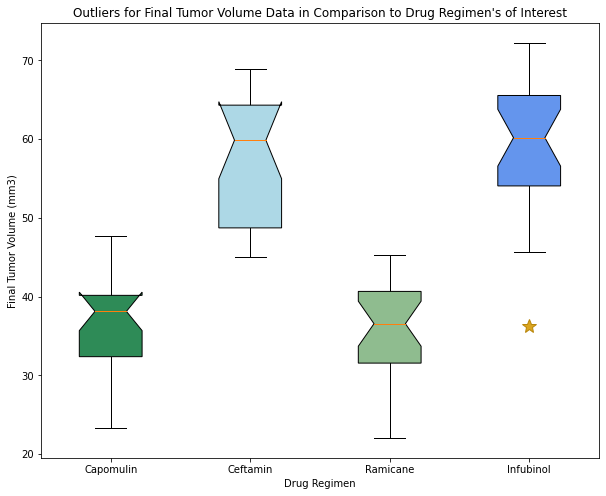

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(figsize=(10, 8))

#titles
ax1.set_title("Outliers for Final Tumor Volume Data in Comparison to Drug Regimen's of Interest")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

#marker styling
flierprops = dict(marker='*', 
                  markersize=14, 
                  markerfacecolor='goldenrod',
                  markeredgecolor='darkgoldenrod')

#boxplot
boxplot1 = ax1.boxplot(tumor_vol_data,
            labels=drug_treatments,
            patch_artist=True,
            flierprops=flierprops,
            notch=True
                      )
#colors
colors = ['seagreen', 'lightblue', 'darkseagreen', 'cornflowerblue']
for boxplot in (boxplot1):
   for patch, color in zip(boxplot1['boxes'], colors):
        patch.set_facecolor(color)
plt.show()

## Line and Scatter Plots

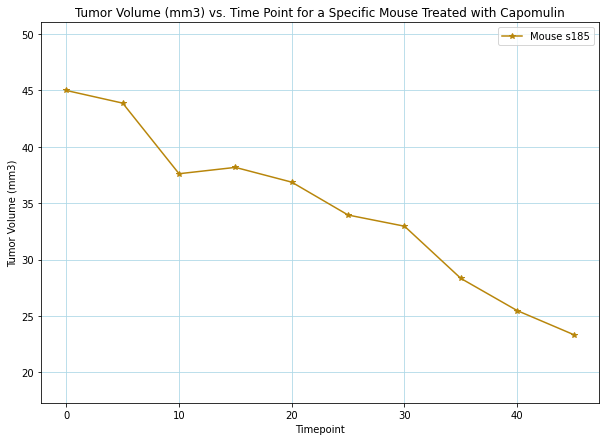

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_data_df.loc[(clean_data_df['Drug Regimen']=='Capomulin'), :]

#filter for a specific mouse
capomulin_mouse = capomulin_data.loc[(capomulin_data['Mouse ID']=='s185'), :]
capomulin_mouse

# Reducing columns
capomulin_mouse_df = capomulin_mouse[['Timepoint','Tumor Volume (mm3)']]
capomulin_mouse_df

#fig size
plt.figure(figsize=(10,7))

#xaxis data
x_axis = []
x_axis = capomulin_mouse_df["Timepoint"].tolist()

#yaxis data
y_axis = []
y_axis = capomulin_mouse_df["Tumor Volume (mm3)"].tolist()

#line plot
plt.plot(x_axis, y_axis, marker ='*', color='darkgoldenrod', label="Mouse s185")

# Set a grid on the plot
plt.grid(color="lightblue")

 # Set our legend to where the chart thinks is best
plt.legend(loc="best")

# titles
plt.title('Tumor Volume (mm3) vs. Time Point for a Specific Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.axis("equal")

plt.show()

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#grab relevant columns from original clean df
new_data = clean_data_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]

#only data for capomulin
capomulin_data = new_data.loc[(new_data['Drug Regimen']=='Capomulin'), :]

# Calculate tumor volume average for each mouse:
grouped_capomulin_df = clean_data_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
grouped_capomulin_df

#merge two df's on mouse id
combined_capomulin = pd.merge(capomulin_data, grouped_capomulin_df, on =["Mouse ID"])
combined_capomulin

#drop tumor volume y
del combined_capomulin['Tumor Volume (mm3)_x']

#rename tumor volume x
combined_capomulin = combined_capomulin.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})

#drop duplicates
combined_capomulin = combined_capomulin.drop_duplicates(subset=['Mouse ID'])

#show sample of data table 
combined_capomulin.head()

,Mouse ID,Drug Regimen,Weight (g),Average Tumor Volume (mm3)
0,s185,Capomulin,17,34.559143
10,x401,Capomulin,15,36.182040
20,m601,Capomulin,17,34.847470
30,f966,Capomulin,17,36.505973
35,u364,Capomulin,17,39.887495


Linear regression equation: y = 0.95x + 21.55


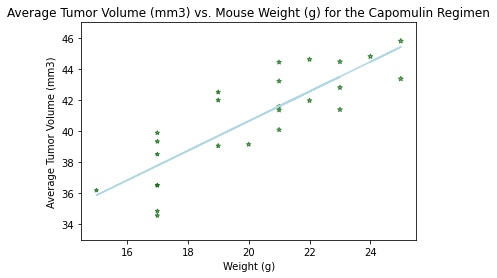

In [48]:
#xaxis data
xdata = combined_capomulin.iloc[:,2]

#yaxis data
ydata = combined_capomulin.iloc[:,3]

#
(slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
regress_values = xdata * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(xdata, 
            ydata, 
            marker="*", 
            facecolors="darkseagreen", 
            edgecolors="darkgreen",
            s=xdata,
            alpha=0.75)

plt.plot(xdata,regress_values,"lightblue")

#print linear regression equation
print(f'Linear regression equation: {line_eq}')

# Create a title, x label, and y label for our chart
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g) for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#set y limit
plt.ylim(33,47)

#show scatter plot
plt.show()


## Correlation and Regression

In [46]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = combined_capomulin.iloc[:,2]
volume = combined_capomulin.iloc[:,3]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84
